# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [5]:
# Get the HTML content of the page after visiting it
html = browser.html
# Create a Beautiful Soup Object
soup = BeautifulSoup(html, 'html.parser')
# Find the table in the HTML
mars_table = soup.find('table', class_='table')  # Adjust the class if necessary


In [6]:
# Extract all rows of data
rows = mars_table.find_all('tr')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [8]:
# Create an empty list
mars_data = []
# Loop through the scraped data to create a list of rows
#Loop through the rows and extract the data
for row in rows:
    # Find all columns in the current row
    columns = row.find_all('td')
    
    # Extract text from each column and strip any extra whitespace
    row_data = [col.text.strip() for col in columns]
    
    # Append the extracted row data to the mars_data list
    mars_data.append(row_data)

In [10]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
columns = ["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"]
mars_df = pd.DataFrame(mars_data, columns=columns)

In [11]:
# Confirm DataFrame was created successfully
print(mars_df)

        id terrestrial_date   sol    ls month min_temp pressure
0     None             None  None  None  None     None     None
1        2       2012-08-16    10   155     6    -75.0    739.0
2       13       2012-08-17    11   156     6    -76.0    740.0
3       24       2012-08-18    12   156     6    -76.0    741.0
4       35       2012-08-19    13   157     6    -74.0    732.0
...    ...              ...   ...   ...   ...      ...      ...
1863  1889       2018-02-23  1973   133     5    -78.0    730.0
1864  1892       2018-02-24  1974   134     5    -77.0    729.0
1865  1894       2018-02-25  1975   134     5    -76.0    729.0
1866  1893       2018-02-26  1976   135     5    -77.0    728.0
1867  1895       2018-02-27  1977   135     5    -77.0    727.0

[1868 rows x 7 columns]


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
# Check for missing values in the id, sol, and month columns
print(mars_df[['id', 'sol', 'month']].isnull().sum())

#Fill Missing Values with a Default Value:
mars_df['id'] = mars_df['id'].fillna(0).astype(int)
mars_df['sol'] = mars_df['sol'].fillna(0).astype(int)
mars_df['month'] = mars_df['month'].fillna(0).astype(int)

#Drop Rows with Missing Values
mars_df = mars_df.dropna(subset=['id', 'sol', 'month'])

# Then attempt to convert the columns again
mars_df['id'] = mars_df['id'].astype(int)
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)


id       1
sol      1
month    1
dtype: int64


In [15]:
# Change data types for data analysis

# Check for missing values
print("Missing values before conversion:")
print(mars_df.isnull().sum())

#Fill Missing Values
mars_df['id'] = mars_df['id'].fillna(0)
mars_df['sol'] = mars_df['sol'].fillna(0)
mars_df['month'] = mars_df['month'].fillna(0)

#Drop rosw with missing values
mars_df = mars_df.dropna(subset=['id', 'sol', 'month'])

#Convert terrestrial_date to datetime:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

#Convert id, sol, and month to integer:
mars_df['id'] = mars_df['id'].astype(int)
mars_df['sol'] = mars_df['sol'].astype(int)
mars_df['month'] = mars_df['month'].astype(int)


#Convert ls, min_temp, and pressure to float:
mars_df['ls'] = mars_df['ls'].astype(float)
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)


Missing values before conversion:
id                  0
terrestrial_date    1
sol                 0
ls                  1
month               0
min_temp            1
pressure            1
dtype: int64


In [16]:
# Confirm type changes were successful by examining data types again
print("\nData types after conversion:")
print(mars_df.dtypes)


Data types after conversion:
id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                         float64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
num_months = mars_df['month'].nunique()
print(f"There are {num_months} months on Mars.")

There are 13 months on Mars.


In [19]:
# 2. How many Martian days' worth of data are there?
num_sols = mars_df['sol'].nunique()
print(f"There are {num_sols} Martian days worth of data in the dataset.")

There are 1868 Martian days worth of data in the dataset.


In [23]:
# 3. What is the average low temperature by month?

# Group by month and calculate the average minimum temperature
avg_min_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

print(avg_min_temp_by_month)

month
0           NaN
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


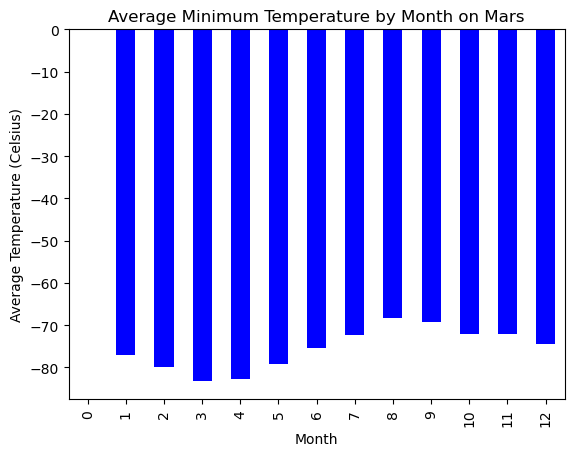

In [22]:
# Plot the average temperature by month
avg_min_temp_by_month.plot(kind='bar', color='blue', title='Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.show()

The coldest month on Mars at Curiosity's location is month 3 with an average temperature of -83.31°C.
The hottest month on Mars at Curiosity's location is month 8 with an average temperature of -68.38°C.


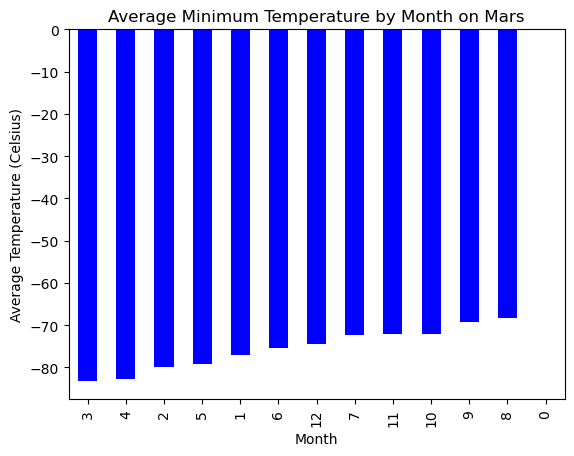

In [24]:
# Identify the coldest and hottest months in Curiosity's location

# Sort the results to easily identify the coldest and hottest months
avg_min_temp_by_month = avg_min_temp_by_month.sort_values()

# Identify the coldest month
coldest_month = avg_min_temp_by_month.idxmin()
coldest_temp = avg_min_temp_by_month.min()

# Identify the hottest month
hottest_month = avg_min_temp_by_month.idxmax()
hottest_temp = avg_min_temp_by_month.max()

print(f"The coldest month on Mars at Curiosity's location is month {coldest_month} with an average temperature of {coldest_temp:.2f}°C.")
print(f"The hottest month on Mars at Curiosity's location is month {hottest_month} with an average temperature of {hottest_temp:.2f}°C.")

# Step 3: Plot the average minimum temperature by month
avg_min_temp_by_month.plot(kind='bar', color='blue', title='Average Minimum Temperature by Month on Mars')
plt.xlabel('Month')
plt.ylabel('Average Temperature (Celsius)')
plt.show()

In [27]:
# 4. Average pressure by Martian month

#Group by month and calculate the average atmospheric pressure
avg_pressure_by_month = mars_df.groupby('month')['pressure'].mean()



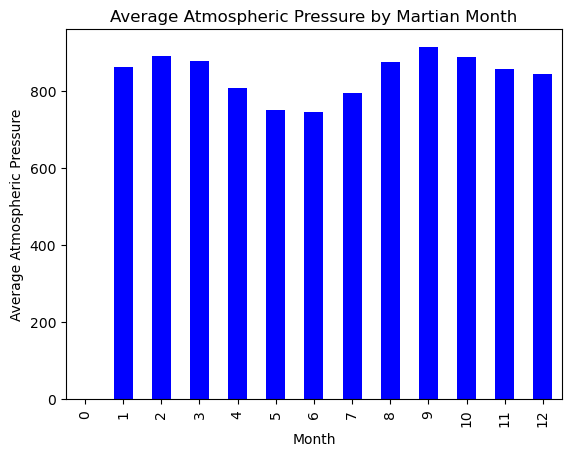

month
0            NaN
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [28]:
# Plot the average pressure by month
# Plot the average atmospheric pressure by Martian month
avg_pressure_by_month.plot(kind='bar', color='blue', title='Average Atmospheric Pressure by Martian Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure')
plt.show()

# Print the DataFrame for reference
print(avg_pressure_by_month)

In [1]:
# 5. How many terrestrial (earth) days are there in a Martian year?

# Sort the DataFrame by terrestrial_date to ensure chronological order
mars_df = mars_df.sort_values(by='terrestrial_date')

# Identify all the points where `ls` is 0, marking the start of a Martian year
start_of_years = mars_df[mars_df['ls'] == 0]

# Identify the rows where `ls` is close to 0 (beginning of the Martian year)
start_of_year = mars_df[mars_df['ls'] == 0].iloc[0]
end_of_year = mars_df[mars_df['ls'] == 0].iloc[-1]

# Calculate the number of Earth days between the start and end of the Martian year
days_in_martian_year = (end_of_year['terrestrial_date'] - start_of_year['terrestrial_date']).days

# Calculate the number of Earth days between consecutive Martian years
days_in_martian_years = start_of_years['terrestrial_date'].diff().dt.days

# Drop the first value because it's NaN (no previous year to compare)
days_in_martian_years = days_in_martian_years.dropna()

# Print the average number of Earth days in a Martian year
average_days_in_martian_year = days_in_martian_years.mean()
print(f"On average, there are approximately {average_days_in_martian_year:.2f} Earth days in a Martian year.")

# Plotting the number of Earth days in each Martian year
plt.figure(figsize=(10, 6))
plt.bar(range(len(days_in_martian_years)), days_in_martian_years, color='blue')
plt.axhline(average_days_in_martian_year, color='red', linestyle='--', label=f'Average = {average_days_in_martian_year:.2f} days')
plt.title('Number of Earth Days in Each Martian Year')
plt.xlabel('Martian Year')
plt.ylabel('Number of Earth Days')
plt.legend()
plt.show()

NameError: name 'mars_df' is not defined

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [33]:
# Write the data to a CSV
mars_df.to_csv('mars_data.csv', index=False)

In [34]:
browser.quit()